# 泰坦尼克号沉船事故案例分析

泰坦尼克号是当时世界上体积最庞大、内部设施最豪华的客运轮船，有“永不沉没”的美誉 。1912年4月14日23时40分左右，泰坦尼克号与一座冰山相撞，造成右舷船艏至船中部破裂，五座水密舱进水。次日凌晨2时20分左右，泰坦尼克船体断裂成两截后沉入大西洋底3700米处。2224名船员及乘客中，逾1500人丧生，其中仅333具罹难者遗体被寻回。泰坦尼克号沉没事故为和平时期死伤人数最为惨重的一次海难，其残骸直至1985年才被再度发现，目前受到联合国教育、科学及文化组织的保护。（来自百度百科）

数据来源：kaggle项目

## 数据介绍

survival - 是否幸存（0=幸存，1=遇难）   
pclass - 船票类型（1=一等票，2=二等票，3=三等票）   
sex - 性别   
age - 年龄   
sibsp - 泰坦尼克号上该人员兄弟姐妹的数量   
parch - 泰坦尼克好上该人员父母或者子女的数量   
ticket - 船票编号   
fare - 乘客票价   
cabin - 客舱号码   
embarked - 起航运港（C = Cherbourg, Q = Queenstown, S = Southampton）   
boat - 救生艇的编号（如果幸存）   
body - 人体编号（如果遇难并且尸体被找到）   
home.dest - 出发地到目的地

## 数据分析

导入pandas、numpy、random、matplotlib等基础包

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] 
%matplotlib inline
import random
import numpy as np
import pandas as pd
from sklearn import datasets, svm, cross_validation, tree, preprocessing, metrics

d:\python35\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


载入数据

In [3]:
titanic_data = pd.read_excel('C:\\Users\\Administrator\\Desktop\\泰坦尼克号沉船事故分析\\titanic3.xls', 'titanic3', index_col =  None, na_values=['NA'])

查看前五行数据

In [4]:
titanic_data.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


计算生还率

In [6]:
titanic_data['survived'].mean()
survive_rate=titanic_data['survived'].mean()
survive_rate


0.3819709702062643

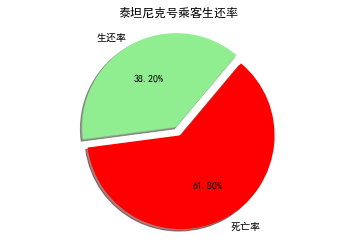

In [33]:

import numpy as np  
import matplotlib.mlab as mlab  
import matplotlib.pyplot as plt  

labels=['生还率','死亡率']

sizes=[0.3819709702062643,1-0.3819709702062643]

colors=['lightgreen','red']

explode=[0,0.1]

plt.pie(sizes,explode=explode,labels=labels,

        colors=colors,autopct='%1.2f%%',shadow=True,startangle=50)

plt.axis('equal')
plt.title("泰坦尼克号乘客生还率")
#plt.show()
plt.savefig('C:\\Users\\Administrator\\Desktop\\泰坦尼克号沉船事故分析\\泰坦尼克号乘客生还率.png',dpi=400,bbox_inches='tight')

计算显示只有38%左右的乘客幸存下来，据调查，泰坦尼克号上并未携带足够的救生艇，只有20艘，船上的所有救生艇仅能供1178人使用，这对于1317名乘客和885名机组人员来说还远远不够。接下来会按照乘客的阶级地位（船票等级）对数据进行分析：

按照船票等级分组，求出各乘客属性的平均值

In [5]:
titanic_data.groupby('pclass').mean()

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


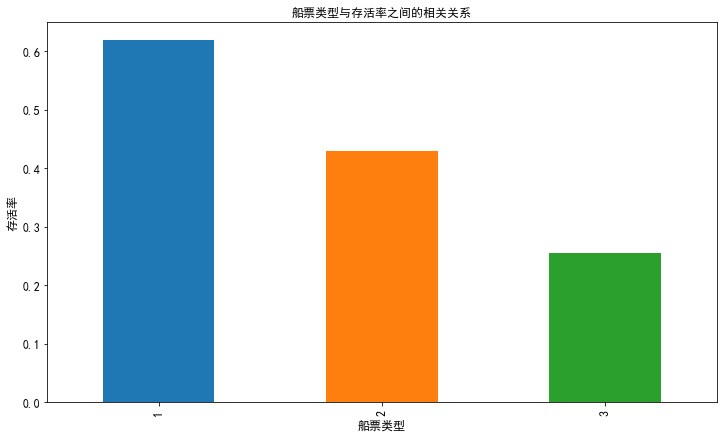

In [30]:
pclass_grouping=titanic_data.groupby('pclass').mean()
pclass_grouping['survived'].plot.bar(figsize=(12, 7), fontsize=12)
plt.title('船票类型与存活率之间的相关关系',fontsize=12)
plt.xlabel('船票类型',fontsize=12)
plt.ylabel('存活率',fontsize=12)
plt.savefig('C:\\Users\\Administrator\\Desktop\\泰坦尼克号沉船事故分析\\船票类型与存活率之间的相关关系.png',dpi=400,bbox_inches='tight')

上图可以看出来头等舱对乘客有62%的生还几率，相比之下三等舱对乘客只有25.5%的生还概率，头等舱乘客的生还率远远高于三等舱，可见当时的阶级属性明显，贫苦百姓受到不公正的待遇。

按照年龄分组，求出各乘客属性的平均值，将年龄从0-80，以10为基准分成了8各年龄段:

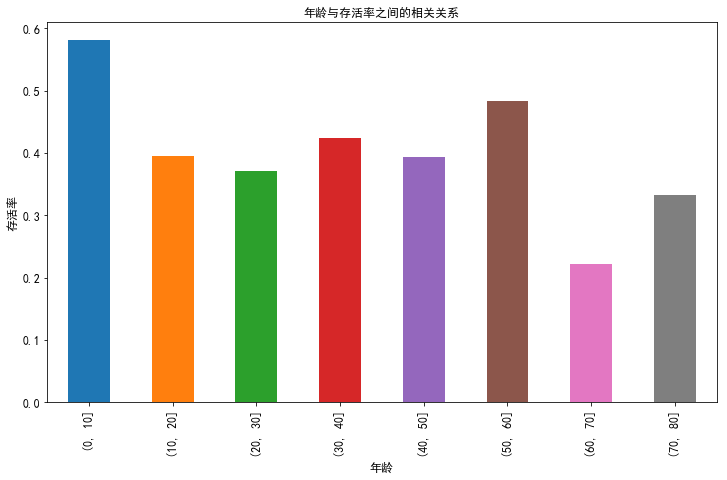

In [40]:
group_by_age = pd.cut(titanic_data["age"], np.arange(0, 90, 10))
pclass_grouping=titanic_data.groupby(group_by_age).mean()
pclass_grouping['survived'].plot.bar(figsize=(12, 7), fontsize=12)
plt.title('年龄与存活率之间的相关关系',fontsize=12)
plt.xlabel('年龄',fontsize=12)
plt.ylabel('存活率',fontsize=12)
plt.savefig('C:\\Users\\Administrator\\Desktop\\泰坦尼克号沉船事故分析\\年龄与存活率之间的相关关系.png',dpi=400,bbox_inches='tight')

上图我们可以看出，其中0-10岁的幼童和小孩生还率最高,50-60人群次之。据调查，在发生事故后，船长曾命令让小孩和老人先上救生艇，由于30-40岁人群应该大多是头等舱的乘客，因此生还率位居第三。

按照性别分组：

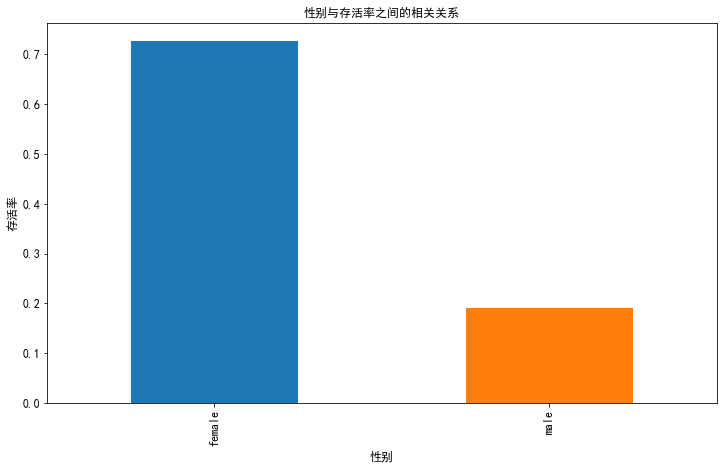

In [21]:
class_sex_grouping = titanic_data.groupby(['sex']).mean()
class_sex_grouping['survived'].plot.bar(figsize=(12, 7), fontsize=12)
plt.title('性别与存活率之间的相关关系',fontsize=12)
plt.xlabel('性别',fontsize=12)
plt.ylabel('存活率',fontsize=12)
plt.savefig('C:\\Users\\Administrator\\Desktop\\泰坦尼克号沉船事故分析\\性别与存活率之间的相关关系.png',dpi=400,bbox_inches='tight')

按照船票等级和性别分组，求出各乘客属性的平均值：

In [36]:
class_sex_grouping = titanic_data.groupby(['pclass','sex']).mean()
class_sex_grouping

survived        age     sibsp     parch        fare        body
pclass sex                                                                    
1      female  0.965278  37.037594  0.555556  0.472222  109.412385         NaN
       male    0.340782  41.029250  0.340782  0.279330   69.888385  162.828571
2      female  0.886792  27.499191  0.500000  0.650943   23.234827   52.000000
       male    0.146199  30.815401  0.327485  0.192982   19.904946  171.233333
3      female  0.490741  22.185307  0.791667  0.731481   15.324250  183.000000
       male    0.152130  25.962273  0.470588  0.255578   12.415462  151.854167

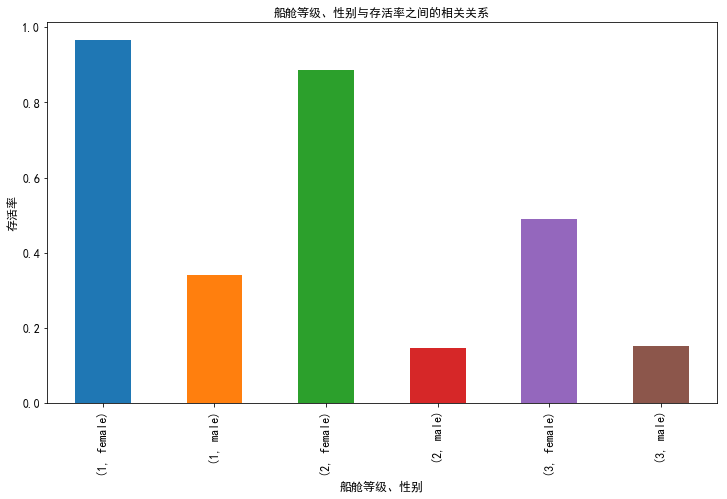

In [37]:
class_sex_grouping['survived'].plot.bar(figsize=(12, 7), fontsize=12)
plt.title('船舱等级、性别与存活率之间的相关关系',fontsize=12)
plt.xlabel('船舱等级、性别',fontsize=12)
plt.ylabel('存活率',fontsize=12)
plt.savefig('C:\\Users\\Administrator\\Desktop\\泰坦尼克号沉船事故分析\\船舱等级、性别与存活率之间的相关关系.png',dpi=400,bbox_inches='tight')

从上面的分析中可以看出来，在惨剧发生的时候大家倾向于首先疏散妇女和儿童。在所有的阶层中，女性比男性更有可能生存下来。

按照年龄和性别分组，求出各乘客属性的平均值：

In [10]:
group_by_age = pd.cut(titanic_data["age"], np.arange(0, 90, 10))
age_sex_grouping = titanic_data.groupby(['sex',group_by_age]).mean()
age_sex_grouping

pclass  survived        age     sibsp     parch       fare  \
sex    age                                                                      
female (0, 10]   2.682927  0.609756   4.355693  1.463415  1.439024  26.932924   
       (10, 20]  2.323529  0.735294  17.044118  0.602941  0.455882  33.923963   
       (20, 30]  2.158730  0.722222  25.333333  0.476190  0.492063  42.511079   
       (30, 40]  1.826667  0.813333  35.306667  0.493333  0.626667  64.832721   
       (40, 50]  1.739130  0.782609  45.782609  0.456522  0.913043  66.778717   
       (50, 60]  1.160000  0.920000  55.680000  0.640000  0.520000  89.606832   
       (60, 70]  1.333333  0.833333  63.166667  0.500000  0.500000  83.172217   
       (70, 80]  1.000000  1.000000  76.000000  1.000000  0.000000  78.850000   
male   (0, 10]   2.622222  0.555556   4.257407  1.933333  1.377778  31.716664   
       (10, 20]  2.670213  0.148936  17.457447  0.617021  0.351064  25.105453   
       (20, 30]  2.485106  0.182979  25.319149  0.246809  0.072340  20.463863   
       (30, 40]  2.266667  0.207407  35.018519  0.288889  0.296296  30.406387   
       (40, 50]  1.813953  0.186047  45.145349  0.337209  0.139535  36.810901   
       (50, 60]  1.540541  0.189189  54.851351  0.270270  0.270270  43.251803   
       (60, 70]  1.571429  0.047619  63.642857  0.285714  0.428571  61.018960   
       (70, 80]  1.800000  0.200000  73.300000  0.000000  0.000000  25.936680   

                       body  
sex    age                   
female (0, 10]          NaN  
       (10, 20]  226.666667  
       (20, 30]  206.000000  
       (30, 40]  194.000000  
       (40, 50]    7.000000  
       (50, 60]   52.000000  
       (60, 70]         NaN  
       (70, 80]         NaN  
male   (0, 10]     4.000000  
       (10, 20]  139.100000  
       (20, 30]  169.281250  
       (30, 40]  152.766667  
       (40, 50]  158.809524  
       (50, 60]  173.250000  
       (60, 70]  207.875000  
       (70, 80]   96.500000

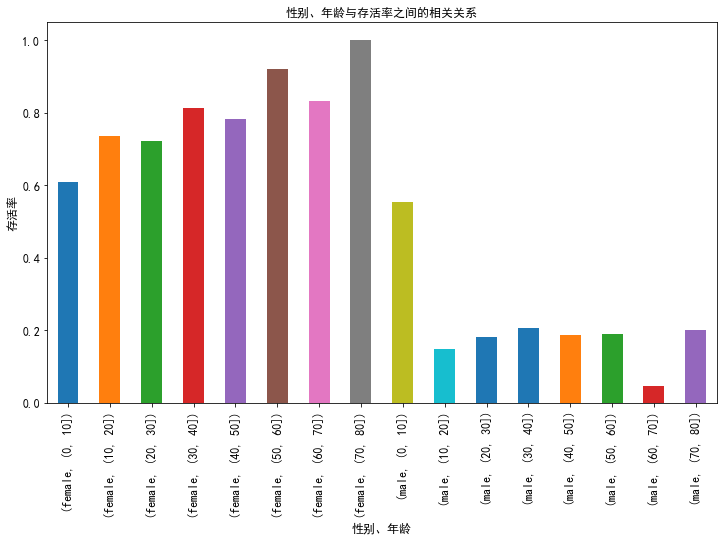

In [39]:
group_by_age = pd.cut(titanic_data["age"], np.arange(0, 90, 10))
age_sex_grouping = titanic_data.groupby(['sex',group_by_age]).mean()
age_sex_grouping['survived'].plot.bar(figsize=(12, 7), fontsize=12)
plt.title('性别、年龄与存活率之间的相关关系',fontsize=12)
plt.xlabel('性别、年龄',fontsize=12)
plt.ylabel('存活率',fontsize=12)
plt.savefig('C:\\Users\\Administrator\\Desktop\\泰坦尼克号沉船事故分析\\性别、年龄与存活率之间的相关关系.png',dpi=400,bbox_inches='tight')

上面的柱状图表示了70-80年龄段的女性生还的比例是最高的。

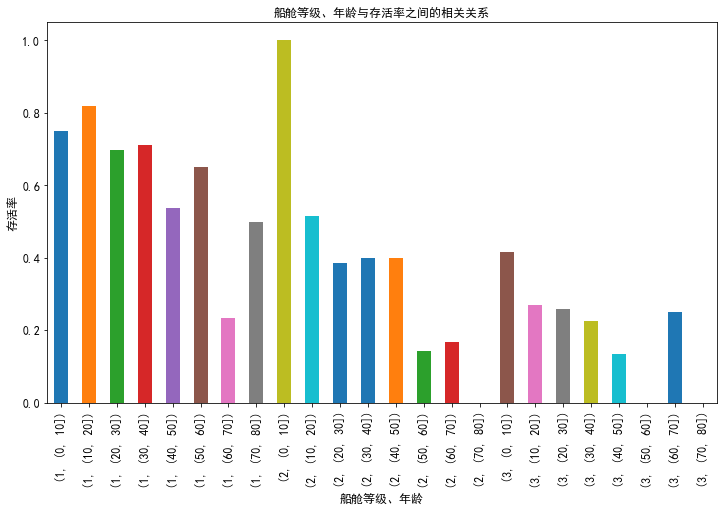

In [38]:
group_by_age = pd.cut(titanic_data["age"], np.arange(0, 90, 10))
class_age_grouping = titanic_data.groupby(['pclass',group_by_age]).mean()
class_age_grouping['survived'].plot.bar(figsize=(12, 7), fontsize=12)
plt.title('船舱等级、年龄与存活率之间的相关关系',fontsize=12)
plt.xlabel('船舱等级、年龄',fontsize=12)
plt.ylabel('存活率',fontsize=12)
plt.savefig('C:\\Users\\Administrator\\Desktop\\泰坦尼克号沉船事故分析\\船舱等级、年龄与存活率之间的相关关系.png',dpi=400,bbox_inches='tight')

## 数据处理

In [32]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


在构建机器学习模型前我们需要删除填充缺失值并且将数据集分为训练集和测试集。

In [33]:
titanic_data.count()

pclass       1309
survived     1309
name         1309
sex          1309
age          1046
sibsp        1309
parch        1309
ticket       1309
fare         1308
cabin         295
embarked     1307
boat          486
body          121
home.dest     745
dtype: int64

缺失值处理:选择删除掉boat、cabin、body这三个缺失值较多而且无法提供足够信息的字段

In [34]:
titanic_data= titanic_data.drop(['body','cabin','boat'], axis=1)
titanic_data.count()

pclass       1309
survived     1309
name         1309
sex          1309
age          1046
sibsp        1309
parch        1309
ticket       1309
fare         1308
embarked     1307
home.dest     745
dtype: int64

缺失值处理:另外还有很多行缺少“home.dest”字段，我们用“NA”值填充缺失的部分。

In [36]:
titanic_data["home.dest"] = titanic_data["home.dest"].fillna("NA")

In [38]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
embarked     1307 non-null object
home.dest    1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


同时我们可以看出来age字段也有一部分数据缺少，因为年龄对于乘客能不能生还会产生较大的影响，所以我们选择删除年龄字段缺失的那部分数据。

In [39]:
titanic_data = titanic_data.dropna()

在做了上述处理后我们重新统计下数据。

In [41]:
titanic_data.count()

pclass       1043
survived     1043
name         1043
sex          1043
age          1043
sibsp        1043
parch        1043
ticket       1043
fare         1043
embarked     1043
home.dest    1043
dtype: int64

In [42]:
titanic_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"


sex和embarked都是与类别（比如sex有两种值，male和female）对应的字符串值，因此通过LabelEncoder我们可以将类别字符串分别转换数值数据，比如将“male”和“female”转换成0和1。name、ticket、home.dest字段无法做编码转换成数值数据，所以我们从数据集中删除掉它们。

In [43]:
def preprocess_titanic_data(data):
    processed_data = data.copy()
    le = preprocessing.LabelEncoder()
    # 将sex（性别）和embarked（起航运港）做编码，从字符串转换成机器学习模型可以识别的数字数据
    processed_data.sex = le.fit_transform(processed_data.sex)
    processed_data.embarked = le.fit_transform(processed_data.embarked)
    # 删除掉name、ticket、home.dest字段
    processed_data = processed_data.drop(['name','ticket','home.dest'],axis=1)
    return processed_data

In [44]:
processed_data = preprocess_titanic_data(titanic_data)

In [45]:
processed_data.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,0,29.0000,0,0,211.3375,2
1,1,1,1,0.9167,1,2,151.5500,2
2,1,0,0,2.0000,1,2,151.5500,2
3,1,0,1,30.0000,1,2,151.5500,2
4,1,0,0,25.0000,1,2,151.5500,2


分离训练数据和目标数据，得到训练集和测试集

In [46]:
X = processed_data.drop(['survived'], axis=1).values
y = processed_data['survived'].values

In [47]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size=0.2)

In [48]:
print(X_train.shape)
print(X_test.shape)
print(X_train.shape[0] / X_test.shape[0])

(834, 7)
(209, 7)
3.9904306220095696


## 机器学习

首先我们使用决策树分类器对数据进行简单的预测。

In [49]:
np.random.seed(42)

from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(max_depth=10)

In [50]:
clf_dt.fit(X_train, y_train)
clf_dt.score(X_test, y_test)

0.7464114832535885

接下来我们再用交叉验证衡量模型的具体表现能力。

In [51]:
np.random.seed(42)

shuffle_validator = cross_validation.ShuffleSplit(len(X), n_iter=20, test_size=0.2, random_state=0)

def test_classifier(clf):
    scores = cross_validation.cross_val_score(clf, X, y, cv=shuffle_validator)
    print("Accuracy: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std()))

In [52]:
test_classifier(clf_dt)

Accuracy: 0.7761 (+/- 0.02)


可以看出来在交叉验证中，数据集选择的不同也会导致预测结果的不同。上述的决策树模型的平均预测准确率为77.61%，根据数据的不同可以有2%左右的浮动变化。

接下来我们再尝试下其他的模型：

In [53]:
np.random.seed(42)
from sklearn.ensemble import RandomForestClassifier
# 随机森林分类器
clf_rf = RandomForestClassifier(n_estimators=50)
test_classifier(clf_rf)

Accuracy: 0.7816 (+/- 0.03)


In [54]:
np.random.seed(42)
from sklearn.ensemble import GradientBoostingClassifier
# 随机森林分类器
clf_rf = GradientBoostingClassifier(n_estimators=50)
test_classifier(clf_rf)

Accuracy: 0.8201 (+/- 0.02)


不同的分类器模型在数据集上的表现不同，通常我们可以尝试不同的机器学习模型从而得到效果最好的模型。

我们还可以使用随机森林算法来获取各个不同特征在最终结果预测中的权重。

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
np.random.seed(42)
clf = RandomForestClassifier(n_estimators=50)
clf = clf.fit(X_train, y_train)

In [56]:
features = pd.DataFrame()
features['feature'] = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

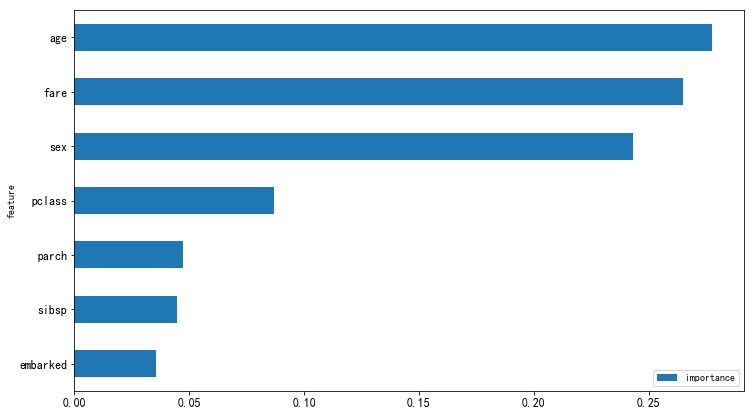

In [57]:
features.plot(kind='barh', figsize=(12, 7), fontsize=12)
plt.show()